# Do time/distance cells really exist?
Compare information content from elapsed time and distance travelled with that of shuffled data

In [22]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('plot_style.mplstyle')

import yaml
import numpy as np
import pingouin as pg
import pandas as pd
from tqdm import tqdm
import h5py
import os


from functions.dataloaders import load_data
from functions.signal_processing import preprocess_data
from functions.tuning import extract_1D_tuning, extract_2D_tuning, extract_discrete_tuning

# Params
with open('params.yaml','r') as file:
    params = yaml.full_load(file)

# Seed for reproducibility
np.random.seed(params['seed'])

In [6]:
session = '../../datasets/calcium_imaging/CA1/M246/M246_OF_1'
data = load_data(session)
data = preprocess_data(data,params)

In [25]:
AMI, p_value, occupancy_frames, active_frames_in_bin, tuning_curves = extract_1D_tuning(data['binaryData'],
                                                            data['elapsed_time'],
                                                            data['running_ts'],
                                                            var_length=params['max_temporal_length'],
                                                            bin_size=params['temporalBinSize'])

shuffled_AMI = np.zeros((params['num_surrogates'],data['binaryData'].shape[1]))
shuffled_pvalue = np.zeros((params['num_surrogates'],data['binaryData'].shape[1]))

for shuffle_i in tqdm(range(params['num_surrogates'])):
    idx = np.random.randint(len(data['elapsed_time']))
    shuffled_time = np.concatenate((data['elapsed_time'][idx:], data['elapsed_time'][:idx]))

    shuffled_AMI[shuffle_i,:], shuffled_pvalue[shuffle_i,:], _, _, _ = extract_1D_tuning(data['binaryData'],
                                            shuffled_time,
                                            data['running_ts'],
                                            var_length=params['max_temporal_length'],
                                            bin_size=params['temporalBinSize'])

 35%|███▌      | 350/1000 [10:26<19:13,  1.78s/it]

In [ ]:
# Plot scatter: y=real AMI, x=mean(shuffled_AMI), c=actual p_value
plt.scatter(x=AMI,y=np.mean(shuffled_AMI,axis=0),c=p_value,cmap='magma')
plt.colorbar(label='$\chi^2$ p-value')
plt.xlabel('Actual AMI')
plt.ylabel('Mean shuffled AMI')
plt.title('Elapsed time')

In [ ]:
# Temporal coding with or without tones
sns.histplot(AMI,
             bins=10,
             stat='density',
             alpha=.1,
             label='Actual')
sns.histplot(np.mean(shuffled_AMI,axis=0),
             bins=10,
             stat='density',
             alpha=.1,
             label='Shuffled')
plt.xscale('log')
plt.title('Elapsed time')
plt.xlabel('AMI')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

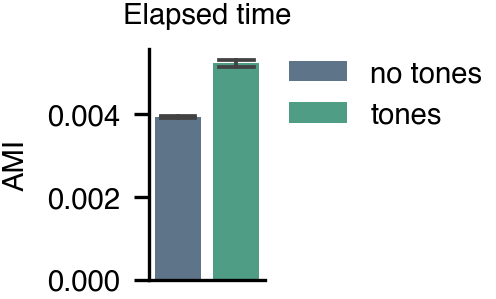

In [148]:
# Temporal coding with or without tones
plt.figure(figsize=(.5,1))
sns.barplot([AMI,np.mean(shuffled_AMI,axis=0)],
             label=['Actual','Shuffled'],
             errorbar='se',
             capsize=.6,
             hue_order=['Actual',[],[],[],[],[],'Shuffled']
             )

plt.title('Elapsed time')
plt.ylabel('AMI')
plt.xticks([])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

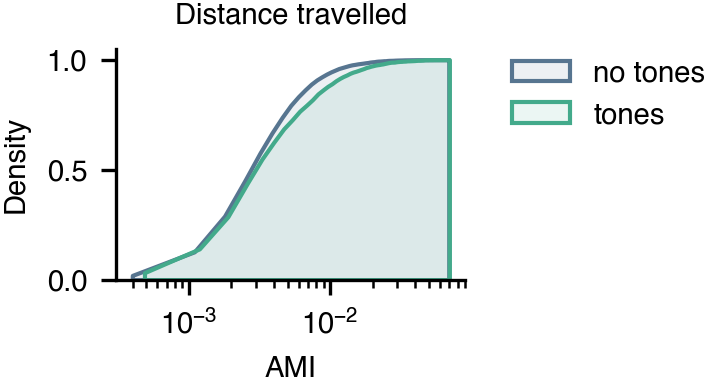

In [152]:
# Distance coding with or without tones
sns.histplot(LT_distance_AMI[LT_distance_pvalue<p_val_threshold],
             bins=100,
             stat='density',
             cumulative=True,
             element='poly',
             alpha=.1,
             label='no tones')
sns.histplot(seqLT_distance_AMI[seqLT_distance_pvalue<p_val_threshold],
             bins=100,
             stat='density',
             cumulative=True,
             element='poly',
             alpha=.1,
             label='tones')
plt.xscale('log')
plt.title('Distance travelled')
plt.xlabel('AMI')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

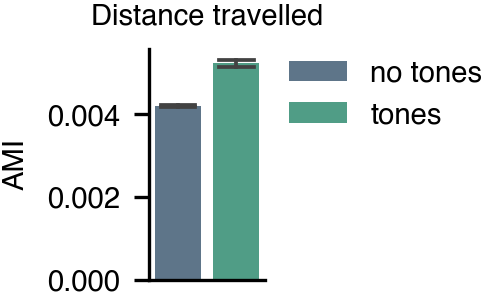

In [151]:
plt.figure(figsize=(.5,1))
sns.barplot([LT_distance_AMI[LT_distance_pvalue<p_val_threshold],seqLT_distance_AMI[seqLT_distance_pvalue<p_val_threshold]],
             label=['no tones','tones'],
             errorbar='se',
             capsize=.6
             )
plt.title('Distance travelled')
plt.ylabel('AMI')
plt.xticks([])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

In [155]:
print(f'n = {len(LT_time_AMI[LT_time_pvalue<p_val_threshold])} neurons')
print(f'n = {len(LT_distance_AMI[LT_distance_pvalue<p_val_threshold])} neurons')

n = 17112 neurons
n = 17134 neurons


In [ ]:
# Using p-value threshold of .05, exclude tuning curves and AMI above threshold

# Plot sorted time and distance tuning curves 



